In [1]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2 * n_data, 1) # mean=2, std=1
y0 = torch.zeros(100)
x1 = torch.normal(-2 * n_data, 1) # mean=-2, std=1
y1 = torch.ones(100)

In [3]:
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1)).type(torch.LongTensor)

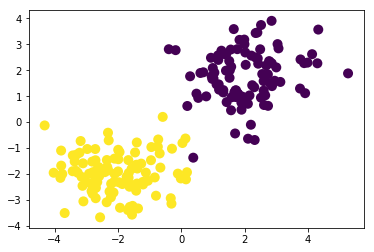

In [4]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y, s=100, lw=0)
plt.show()

In [5]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super().__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.predict(x)
        return torch.softmax(x, 1)

In [6]:
net = Net(2, 10, 2)

In [7]:
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


In [8]:
plt.ion()
plt.show()

In [9]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.005)
loss_fun = torch.nn.CrossEntropyLoss()

0.955


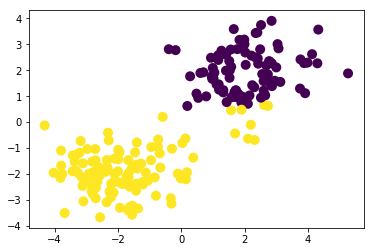

0.955


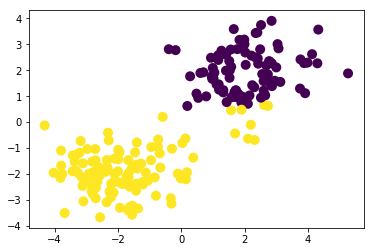

0.96


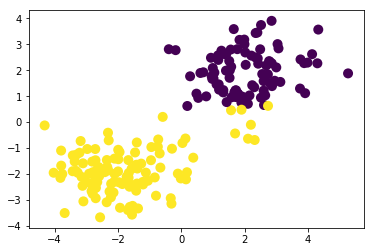

0.96


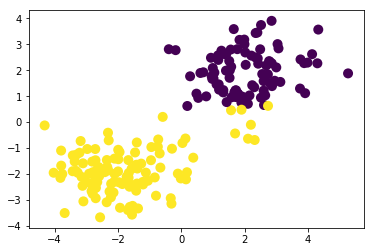

0.97


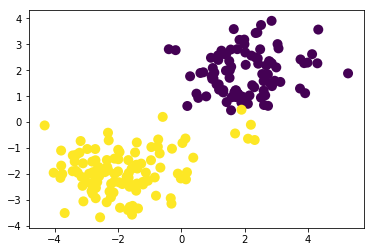

0.975


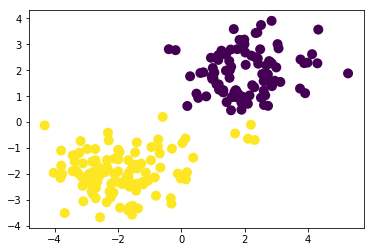

0.975


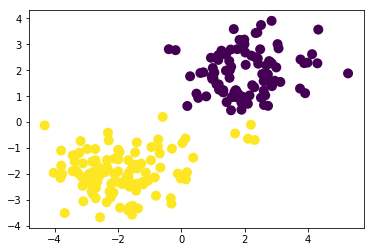

0.975


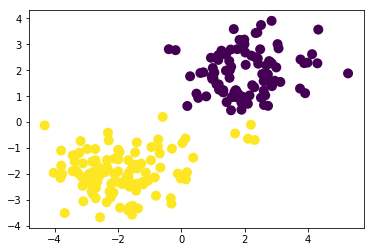

0.975


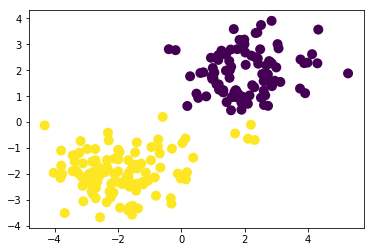

0.975


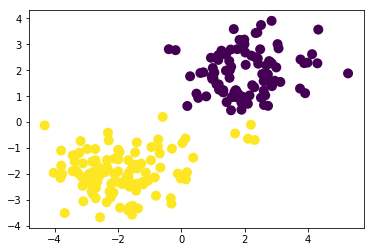

In [11]:
for t in range(100):
    out = net(x)
    loss = loss_fun(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 10 == 0:
        plt.cla()
        prediction = torch.max(out, 1)[1]
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=prediction, s=100, lw=0)
        accuracy = sum(prediction.data.numpy() == target_y) / 200
        print(accuracy)
        plt.pause(0.1)
plt.ioff()
plt.show()
    